In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse

In [ ]:
ls crime_data_raw/2017

In [2]:
path = 'crime_data_raw/2017_raw.csv'

In [3]:
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [4]:
df.head()

,Date_Hour,Unnamed: 0,# offenses,Beat,Block Range,BlockRange,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,2017-04-10 15:00:00,0,1.0,10H10,NaN,200-299,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,2017-04-11 15:00:00,1,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,2017-04-11 17:00:00,2,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,2017-04-12 09:00:00,3,1.0,10H10,NaN,4600-4699,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,2017-04-12 19:00:00,4,1.0,10H10,NaN,100-199,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


## Inspect Premise col

In [5]:
len(df.Premise.value_counts(dropna=False))

253

In [6]:
df.Premise.value_counts(dropna=False).head()

Residence or House           13967
Apartment Parking Lot        12838
Road, Street, or Sidewalk    11296
Apartment                    10248
Other Parking Lot             4864
Name: Premise, dtype: int64

In [7]:
len(df.Premise.unique())

253

In [8]:
df.Premise = df.Premise.str.strip()

In [9]:
len(df.Premise.value_counts(dropna=False))

133

In [10]:
df.Premise.value_counts(dropna=False).head()

Residence or House           15197
Apartment Parking Lot        14009
Road, Street, or Sidewalk    12408
Apartment                    11301
Other Parking Lot             5419
Name: Premise, dtype: int64

In [11]:
# check if  null values
df.isnull().values.any().any()

True

In [12]:
# check su, of null values
df.isnull().values.sum()

359659

In [13]:
len(df[df.isnull().any(axis=1)])

119724

## Visualize our data

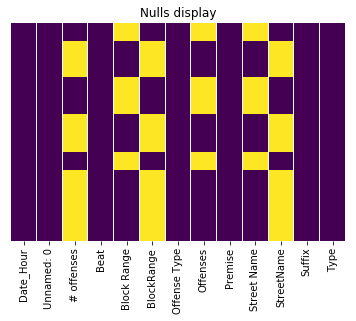

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [15]:
df.head()

,Date_Hour,Unnamed: 0,# offenses,Beat,Block Range,BlockRange,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,2017-04-10 15:00:00,0,1.0,10H10,NaN,200-299,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,2017-04-11 15:00:00,1,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,2017-04-11 17:00:00,2,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,2017-04-12 09:00:00,3,1.0,10H10,NaN,4600-4699,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,2017-04-12 19:00:00,4,1.0,10H10,NaN,100-199,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [16]:
# if duplicate columns
df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# offenses'] = pd.concat([df['# offenses'].dropna(),
                              df['Offenses'].dropna()]).reindex_like(df)

In [17]:
df.head()

,Date_Hour,Unnamed: 0,# offenses,Beat,Block Range,BlockRange,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,2017-04-10 15:00:00,0,1.0,10H10,NaN,200-299,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,2017-04-11 15:00:00,1,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,2017-04-11 17:00:00,2,1.0,10H10,NaN,2300-2399,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,2017-04-12 09:00:00,3,1.0,10H10,NaN,4600-4699,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,2017-04-12 19:00:00,4,1.0,10H10,NaN,100-199,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [18]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)

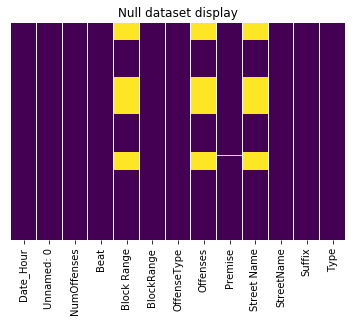

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Subset dataframe to work on 

In [20]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119724 entries, 0 to 119723
Data columns (total 7 columns):
Date_Hour      119724 non-null datetime64[ns]
Beat           119724 non-null object
BlockRange     119724 non-null object
StreetName     119724 non-null object
OffenseType    119724 non-null object
Premise        119237 non-null object
NumOffenses    119724 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.4+ MB


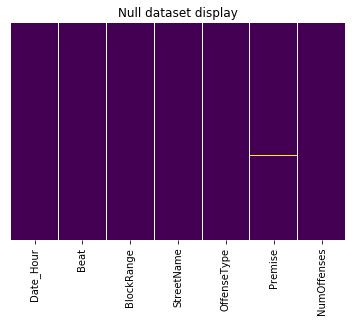

In [21]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

# FIND NAN onevery col

In [22]:
len(crimes[crimes.isnull().any(axis=1)])

487

In [23]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
30,2017-04-29 21:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0
132,2017-04-16 07:00:00,10H40,2700-2799,TRAVIS,Burglary,NaN,1.0
185,2017-04-06 22:00:00,10H40,1500-1599,HADLEY,Theft,NaN,1.0
259,2017-04-18 01:00:00,10H50,3900-3999,DENNIS,Theft,NaN,1.0
391,2017-04-04 22:00:00,10H60,2800-2899,SOUTHMORE,Aggravated Assault,NaN,1.0


## Find NaN
- drop if > 2 nan

In [24]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119724 entries, 0 to 119723
Data columns (total 7 columns):
Date_Hour      119724 non-null datetime64[ns]
Beat           119724 non-null object
BlockRange     119724 non-null object
StreetName     119724 non-null object
OffenseType    119724 non-null object
Premise        119237 non-null object
NumOffenses    119724 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.4+ MB


In [25]:
len(crimes[crimes.isnull().any(axis=1)])

487

In [26]:
crimes[crimes.isnull().any(axis=1)].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
30,2017-04-29 21:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0
132,2017-04-16 07:00:00,10H40,2700-2799,TRAVIS,Burglary,NaN,1.0
185,2017-04-06 22:00:00,10H40,1500-1599,HADLEY,Theft,NaN,1.0
259,2017-04-18 01:00:00,10H50,3900-3999,DENNIS,Theft,NaN,1.0
391,2017-04-04 22:00:00,10H60,2800-2899,SOUTHMORE,Aggravated Assault,NaN,1.0


## Inspect each column

In [27]:
crimes.dtypes

Date_Hour      datetime64[ns]
Beat                   object
BlockRange             object
StreetName             object
OffenseType            object
Premise                object
NumOffenses           float64
dtype: object

## Beat
- 120 beats

In [28]:
len(crimes.Beat.value_counts())

237

In [29]:
len(crimes.Beat.value_counts(dropna=False))

237

In [30]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [31]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
len(crimes.Beat.value_counts(dropna=False))

237

In [33]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [35]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [36]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2852
15E40    2443
12D10    2430
19G10    2205
18F20    2202
Name: Beat, dtype: int64

## BlockRange

In [37]:
len(crimes.BlockRange.value_counts(dropna=False))

320

In [38]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1652
UNK          1629
100-199      1605
2400-2499    1553
2300-2399    1472
Name: BlockRange, dtype: int64

In [39]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [40]:
len(crimes.BlockRange.value_counts(dropna=False))

320

## StreetName

In [41]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:21586


In [42]:
crimes.StreetName = crimes.StreetName.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [43]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:18672


In [44]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER       2101
WESTHEIMER RD    1438
GESSNER          1028
NORTH             882
LOOP              833
Name: StreetName, dtype: int64


## OffenseType

In [45]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:16


In [46]:
crimes.OffenseType = crimes.OffenseType.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:9


In [48]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67419
Burglary              17084
Aggravated Assault    12314
Robbery                9778
AutoTheft              7627
Auto Theft             3874
Rape                   1368
Murder                  258
1                         2
Name: OffenseType, dtype: int64


In [49]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [50]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67419
Burglary              17084
Aggravated Assault    12314
Auto Theft            11501
Robbery                9778
Rape                   1368
Murder                  258
1                         2
Name: OffenseType, dtype: int64


## Premise

In [51]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:133


In [52]:
crimes.Premise = crimes.Premise.str.strip()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [53]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:133


In [54]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House           15197
Apartment Parking Lot        14009
Road, Street, or Sidewalk    12408
Apartment                    11301
Other Parking Lot             5419
Name: Premise, dtype: int64

# Date as index

In [55]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119724 entries, 0 to 119723
Data columns (total 7 columns):
Date_Hour      119724 non-null datetime64[ns]
Beat           119724 non-null object
BlockRange     119724 non-null object
StreetName     119724 non-null object
OffenseType    119724 non-null object
Premise        119237 non-null object
NumOffenses    119724 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.4+ MB


In [59]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)
crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [60]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses
Date_Hour,,,,,,
1917-01-20 12:00:00,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0
1917-02-20 15:00:00,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0
1917-02-20 16:00:00,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0
1917-04-16 12:00:00,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0
1917-12-18 14:00:00,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0


In [63]:
crimes.index.strftime('%T')

array(['12:00:00', '15:00:00', '16:00:00', ..., '23:00:00', '23:00:00',
       '23:00:00'], dtype='<U8')

## Create Columns with day,weekday,month,year from date index

In [64]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')
crimes['Hour'] = crimes.index.strftime('%T')

In [65]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
1917-01-20 12:00:00,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,20,Saturday,Jan,1917,12:00:00
1917-02-20 15:00:00,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,20,Tuesday,Feb,1917,15:00:00
1917-02-20 16:00:00,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,20,Tuesday,Feb,1917,16:00:00
1917-04-16 12:00:00,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,16,Monday,Apr,1917,12:00:00
1917-12-18 14:00:00,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,18,Tuesday,Dec,1917,14:00:00


In [66]:
crimes.day.unique()

array(['20', '16', '18', '29', '26', '06', '31', '03', '01', '24', '15',
       '13', '21', '04', '09', '25', '30', '07', '08', '11', '23', '10',
       '28', '02', '27', '19', '17', '14', '22', '12', '05'], dtype=object)

In [67]:
len(crimes.day.unique())

31

In [68]:
crimes.day.value_counts(dropna=False)

13    4153
01    4092
05    4089
06    4072
20    4049
17    4037
18    3997
26    3990
22    3975
07    3974
04    3950
14    3943
15    3934
21    3924
11    3922
10    3922
24    3916
19    3902
16    3866
27    3864
03    3864
02    3859
08    3857
12    3835
23    3809
28    3806
09    3786
25    3743
30    3723
29    3471
31    2400
Name: day, dtype: int64

In [69]:
crimes.weekday.unique()

array(['Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [70]:
crimes.weekday.value_counts(dropna=False)

Monday       18202
Friday       17919
Thursday     17736
Tuesday      17336
Wednesday    17329
Saturday     16317
Sunday       14885
Name: weekday, dtype: int64

In [71]:
crimes.month.value_counts(dropna=False)

Jan    10544
May    10530
Dec    10491
Jul    10470
Jun    10367
Aug    10085
Mar     9837
Oct     9817
Nov     9748
Feb     9716
Apr     9504
Sep     8615
Name: month, dtype: int64

In [72]:
crimes.year.value_counts(dropna=False)

2017    118578
2016      1002
2015        51
2014        31
2013        10
2010         8
2007         7
1917         5
2011         5
2009         3
2012         3
2006         2
1993         2
2005         2
1983         2
2008         2
1920         2
2002         2
1976         1
1953         1
2001         1
2000         1
1927         1
1964         1
1990         1
Name: year, dtype: int64

## null values

- check
- count
- display

In [73]:
crimes.isnull().values.any().any()

True

In [74]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

487

In [75]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,day,weekday,month,year,Hour
Date_Hour,,,,,,,,,,,
2007-12-30 16:00:00,3B30,2000-2099,43RD,Theft,NaN,1.0,30,Sunday,Dec,2007,16:00:00
2014-01-08 12:00:00,6B60,800-899,GREENS,Rape,NaN,1.0,08,Wednesday,Jan,2014,12:00:00
2016-10-07 22:00:00,4F30,2100-2199,HIGHWAY 6,Aggravated Assault,NaN,1.0,07,Friday,Oct,2016,22:00:00
2016-10-09 08:00:00,19G10,9700-9799,BISSONNET,Rape,NaN,1.0,09,Sunday,Oct,2016,08:00:00
2016-10-15 17:00:00,17E30,9000-9099,BELLFORT,Theft,NaN,1.0,15,Saturday,Oct,2016,17:00:00


In [ ]:
crimes.info()

## New Dataframe
- remove premise col
- keep premise description

In [76]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1917-01-20 12:00:00,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,12:00:00,20,Saturday,Jan,1917
1917-02-20 15:00:00,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,15:00:00,20,Tuesday,Feb,1917
1917-02-20 16:00:00,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,16:00:00,20,Tuesday,Feb,1917
1917-04-16 12:00:00,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,12:00:00,16,Monday,Apr,1917
1917-12-18 14:00:00,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,14:00:00,18,Tuesday,Dec,1917


In [77]:
crime_yr.isnull().values.any().any()

True

In [78]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

487

In [79]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2017-04-28 18:00:00,14D40,12300-12399,MARTIN LUTHER KING,Aggravated Assault,NaN,1.0,18:00:00,28,Friday,Apr,2017
2017-04-28 22:00:00,7C20,2100-2199,KIRK,Robbery,NaN,1.0,22:00:00,28,Friday,Apr,2017
2017-04-29 12:00:00,2A30,200-299,20TH,Robbery,NaN,1.0,12:00:00,29,Saturday,Apr,2017
2017-04-29 18:00:00,5F40,7700-7799,WILLOW CHASE,Theft,NaN,1.0,18:00:00,29,Saturday,Apr,2017
2017-04-29 21:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0,21:00:00,29,Saturday,Apr,2017


# FIND NANS

## INDEX

In [80]:
len(crime_yr[crime_yr.index.isnull()])

0

In [81]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [82]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1917-01-20 12:00:00', '1917-02-20 15:00:00',
               '1917-02-20 16:00:00', '1917-04-16 12:00:00',
               '1917-12-18 14:00:00', '1920-02-29 18:00:00',
               '1920-04-26 13:00:00', '1927-04-06 18:00:00',
               '1953-07-20 19:00:00', '1964-10-31 08:00:00',
               ...
               '2017-12-31 22:00:00', '2017-12-31 22:00:00',
               '2017-12-31 23:00:00', '2017-12-31 23:00:00',
               '2017-12-31 23:00:00', '2017-12-31 23:00:00',
               '2017-12-31 23:00:00', '2017-12-31 23:00:00',
               '2017-12-31 23:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=119724, freq=None)

In [83]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [84]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [85]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [86]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [87]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [88]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [89]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [90]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [91]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [92]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [93]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [94]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [95]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [96]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [97]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [98]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [99]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [100]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie 

In [101]:
len(crime_yr[crime_yr['Premise'].isnull()])

487

In [102]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
2007-12-30 16:00:00,3B30,2000-2099,43RD,Theft,NaN,1.0,16:00:00,30,Sunday,Dec,2007
2014-01-08 12:00:00,6B60,800-899,GREENS,Rape,NaN,1.0,12:00:00,08,Wednesday,Jan,2014
2016-10-07 22:00:00,4F30,2100-2199,HIGHWAY 6,Aggravated Assault,NaN,1.0,22:00:00,07,Friday,Oct,2016
2016-10-09 08:00:00,19G10,9700-9799,BISSONNET,Rape,NaN,1.0,08:00:00,09,Sunday,Oct,2016
2016-10-15 17:00:00,17E30,9000-9099,BELLFORT,Theft,NaN,1.0,17:00:00,15,Saturday,Oct,2016


In [103]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [104]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [105]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [106]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [107]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

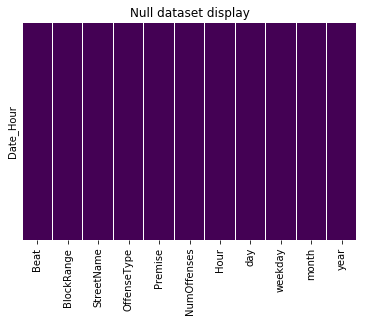

In [108]:
sns.heatmap(crime_yr.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

In [ ]:
crime_yr.head()

In [ ]:
ls crime_data_clean/new

In [109]:
crime_yr.to_csv('crime_data_clean/years/Final_crime17_clean.csv')

In [110]:
ls crime_data_clean/years

Final_crime17_clean.csv*
